In [1]:
from shubov_algorithms import neural_network, helpers
import numpy as np
import pandas as pd

## Dataset

In [2]:
# shell scripts for downloading the data and placing it in a corresponding directory
!mkdir iris
!curl -o iris/iris.data "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
!curl -o iris/description "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.names"
!curl -o iris/bezdekIris.data "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/bezdekIris.data"
!cat iris/description

mkdir: iris: File exists
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4551  100  4551    0     0  14177      0 --:--:-- --:--:-- --:--:-- 14177
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2998  100  2998    0     0   9140      0 --:--:-- --:--:-- --:--:--  9112
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4551  100  4551    0     0  14447      0 --:--:-- --:--:-- --:--:-- 14447
1. Title: Iris Plants Database
	Updated Sept 21 by C.Blake - Added discrepency information

2. Sources:
     (a) Creator: R.A. Fisher
     (b) Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
     (c) Date: July, 1988

3. Past Usage:
   - Publications: too m

In [3]:
data_frame_data = pd.read_csv("./iris/iris.data", header=None)
data_frame_data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
np_data = data_frame_data.to_numpy()
np.random.shuffle(np_data)
features, targets = np_data[:,0:4].astype(float), np_data[:,4]

## Transform targets

In [5]:
targets = helpers.transform_targets_to_numbers(targets)

## Learn

Loss after iteration 0: 1.278924
Loss after iteration 1000: 0.458533
Loss after iteration 2000: 0.093103
Loss after iteration 3000: 0.079198
Loss after iteration 4000: 0.074564
Loss after iteration 5000: 0.071994
Loss after iteration 6000: 0.069946
Loss after iteration 7000: 0.067572
Loss after iteration 8000: 0.065331
Loss after iteration 9000: 0.063414
Loss after iteration 10000: 0.061808
Loss after iteration 11000: 0.060522
Loss after iteration 12000: 0.059573
Loss after iteration 13000: 0.058933
Loss after iteration 14000: 0.058444
Loss after iteration 15000: 0.057813
Loss after iteration 16000: 0.056892
Loss after iteration 17000: 0.055792
Loss after iteration 18000: 0.054650
Loss after iteration 19000: 0.053538


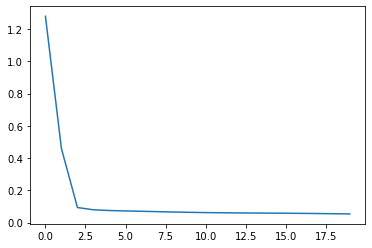

In [6]:
number_of_features = len(features[0])
input_dimensions = number_of_features

number_of_classes = len(np.unique(targets))
output_dimensions = number_of_classes 

number_of_neurons = number_of_features + 1

model = neural_network.NeuralNetwork(
    input_dim=input_dimensions, 
    output_dim=output_dimensions,
    hidden_dimension=number_of_neurons,
    reg_lambda=0.01,
    epsilon=0.001,
    print_loss=True,
    epochs=20000,
    print_step=1000
)

features_train, features_test = helpers.split_data(features)
targets_train, targets_test = helpers.split_data(targets)

model.learn(features_train, targets_train)

## True targets

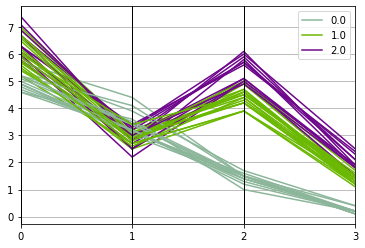

In [7]:
helpers.plot_parallel_coordinates(features_test, targets_test, 4)

## Predicted targets

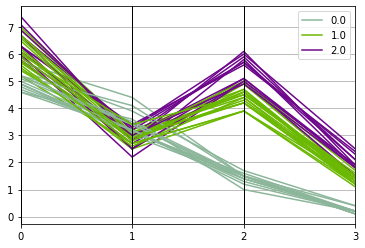

In [8]:
helpers.plot_parallel_coordinates(features_test, model.infer(features_test), 4)#%% md

## Difference

In [9]:
(targets_test - model.infer(features_test))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])